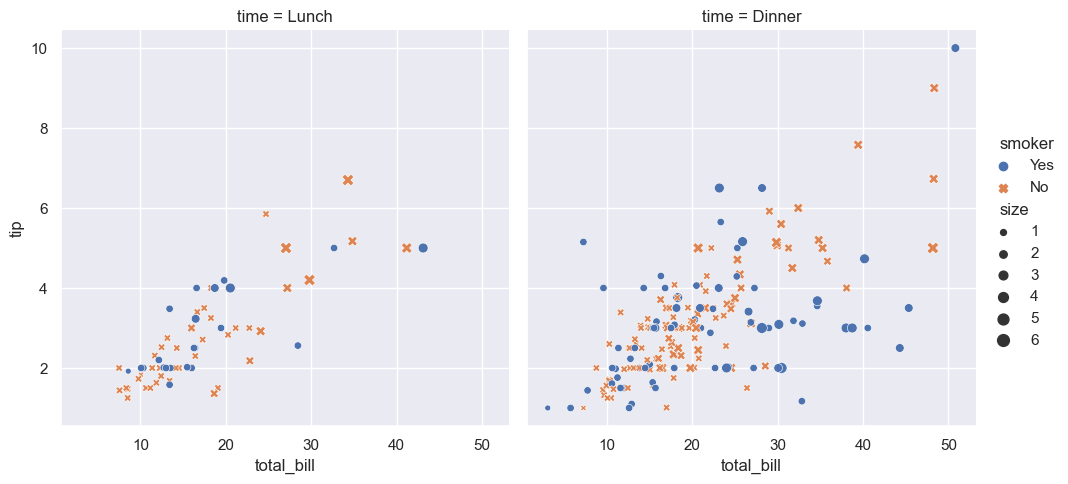

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# apply the default theme
sns.set_theme()

tips = sns.load_dataset('tips')

# create a visualization
sns.relplot(data=tips,
          x='total_bill', y='tip', col='time',
          hue='smoker', style='smoker', size='size');

## A high-level API for statistical graphics

In [12]:
dots = sns.load_dataset('dots')
dots.head(3)

align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840

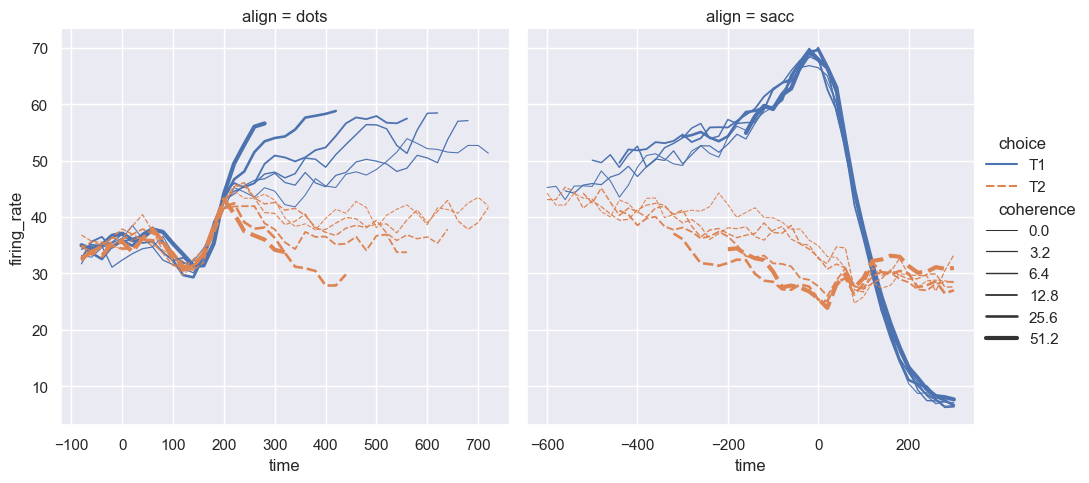

In [16]:
sns.relplot(data=dots, kind='line', 
            x='time', y='firing_rate', col='align', 
            hue='choice', size='coherence', style='choice', 
            facet_kws=dict(sharex=False));

## Statistical estimation 

In [17]:
fmri = sns.load_dataset('fmri')
fmri.head(3)

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033

In [25]:
fmri.groupby(['region', 'event','timepoint'])['signal'].mean()

region    event  timepoint
frontal   cue    0           -0.013137
                 1           -0.015612
                 2           -0.006178
                 3            0.018232
                 4            0.041279
                                ...   
parietal  stim   14          -0.083642
                 15          -0.068194
                 16          -0.057795
                 17          -0.053814
                 18          -0.054538
Name: signal, Length: 76, dtype: float64

In [29]:
fmri.loc[(fmri['region']=='parietal') & (fmri['timepoint'].isin([5, 6, 11, 12]))].groupby(['region', 'event','timepoint'])['signal'].mean()

region    event  timepoint
parietal  cue    5            0.069338
                 6            0.039485
                 11          -0.043072
                 12          -0.029013
          stim   5            0.267221
                 6            0.282978
                 11          -0.092852
                 12          -0.104072
Name: signal, dtype: float64

In [31]:
fmri.loc[(fmri['region']=='parietal') & (fmri['timepoint'].isin([5, 6, 11, 12]))].groupby(['region', 'event','timepoint'])['signal'].agg(['mean', 'min', 'max'])

mean       min       max
region   event timepoint                              
parietal cue   5          0.069338 -0.008158  0.215735
               6          0.039485 -0.046841  0.181533
               11        -0.043072 -0.149785  0.009137
               12        -0.029013 -0.103785  0.030923
         stim  5          0.267221  0.175532  0.476055
               6          0.282978  0.143093  0.564985
               11        -0.092852 -0.238474 -0.023274
               12        -0.104072 -0.255486 -0.040385

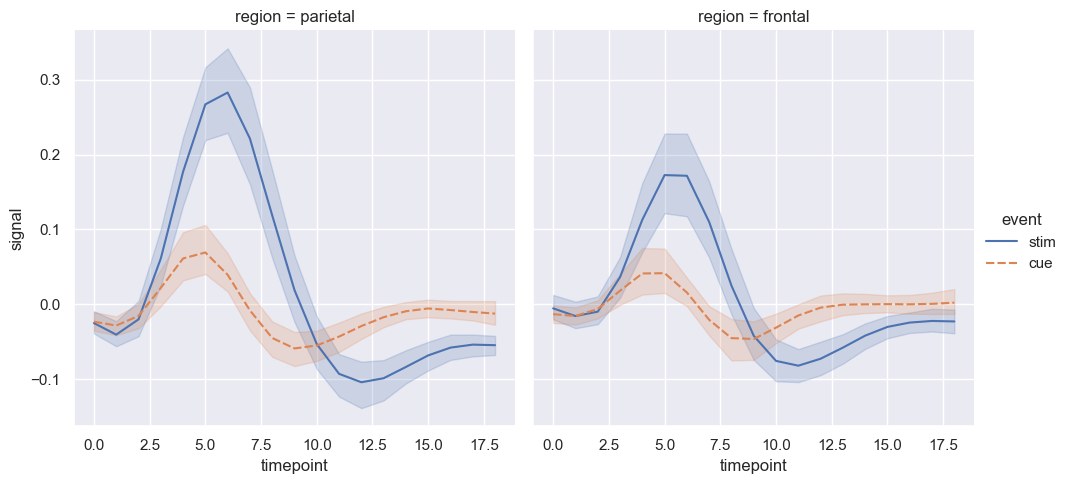

In [38]:
sns.relplot(data=fmri, kind='line', 
            x='timepoint', y='signal', col='region',
            hue='event', style='event'); # 线有阴影是因为线是分组求mean的结果，阴影是95%置信区间(default ci=95),可以加上ci=None去掉阴影部分

Statistical estimation in seaborn goes beyond descriptive statistics. For example, it is possible to enhance a scatterplot by including a linear regression model (and its uncertainty) using lmplot():

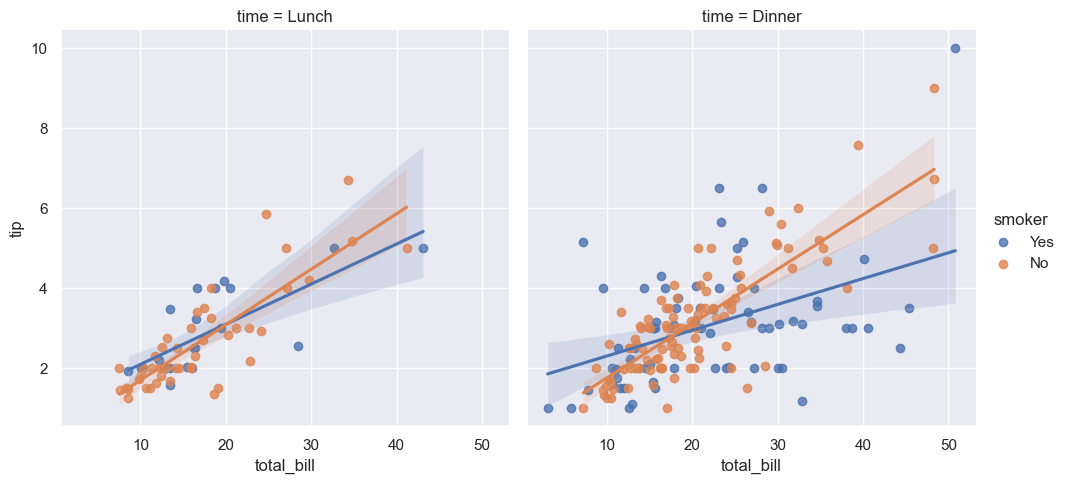

In [126]:
sns.lmplot(data=tips, x='total_bill', y='tip', col='time', hue='smoker');

## Distributional representations

In [44]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

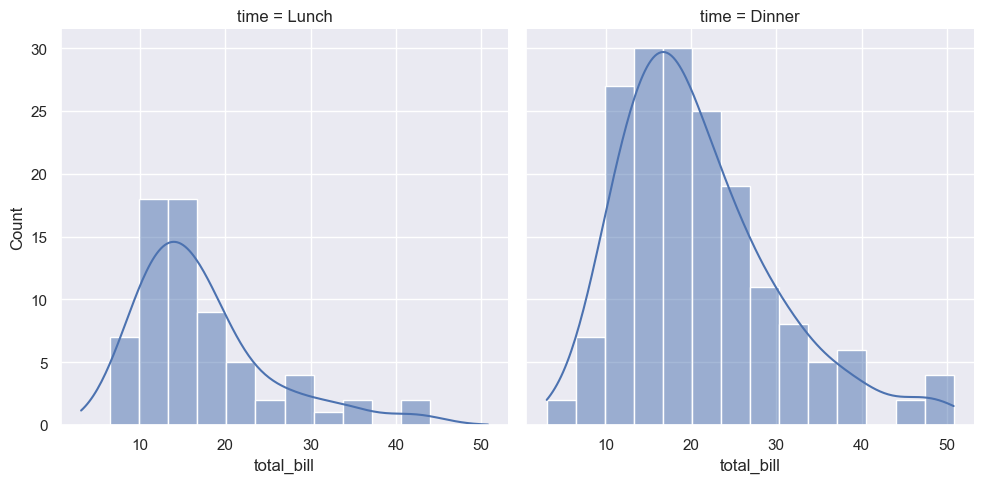

In [43]:
sns.displot(data=tips, x='total_bill', col='time', kde=True);

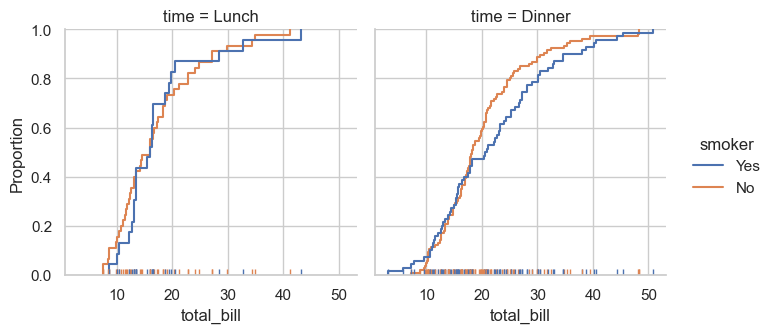

In [59]:
sns.set_style('whitegrid')
# plt.figure(figsize=(4, 2))
sns.displot(data=tips, kind='ecdf', x='total_bill', col='time', hue='smoker', rug=True, height=3.5)

## Plot for categorical data

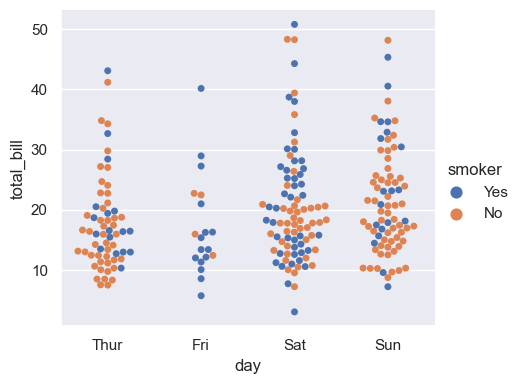

In [67]:
sns.set_theme()
sns.catplot(data=tips, kind='swarm', x='day', y='total_bill', hue='smoker', height=4, aspect=1.15);

Alternately, you could use kernel density estimation to represent the underlying distribution that the points are sampled from:

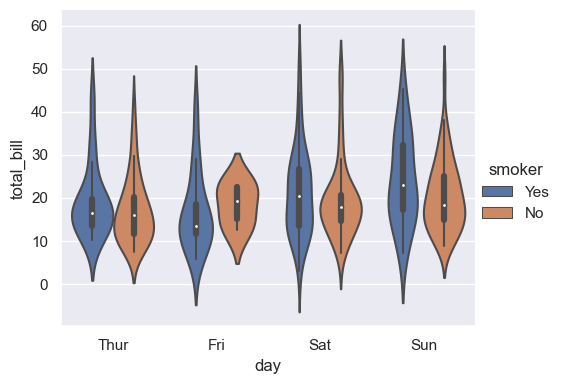

In [83]:
sns.catplot(data=tips, kind='violin', x='day', y='total_bill', hue='smoker', height=4, aspect=1.25);

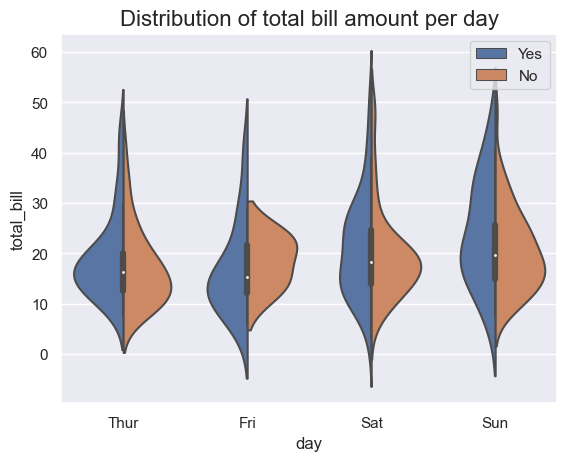

In [80]:
ax = sns.violinplot(data=tips, x='day', y='total_bill', hue='smoker', split=True, height=4, aspect=1.25)
ax.set_title('Distribution of total bill amount per day', fontsize=16)
ax.legend(loc='best', frameon=True);

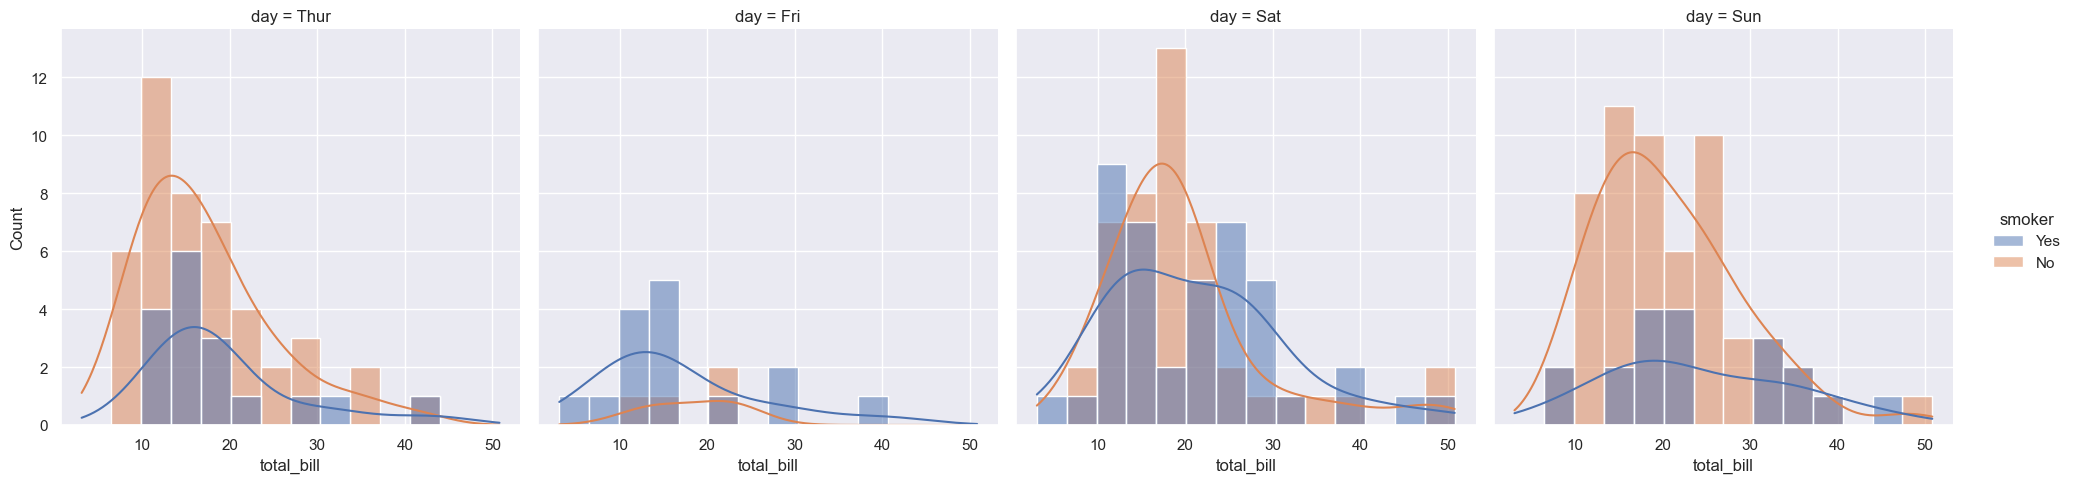

In [81]:
sns.displot(data=tips, x='total_bill', col='day', hue='smoker', kde=True);

**小提琴图是箱型图和核密度图的结合体**

Or you could show only the mean value and its confidence interval within each nested category:

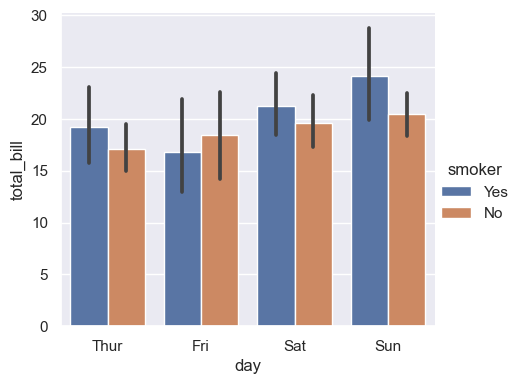

In [70]:
sns.catplot(data=tips, kind='bar', x='day', y='total_bill', hue='smoker', height=4, aspect=1.15);

## Multivariate views on complex datasets

In [84]:
penguins = sns.load_dataset('penguins')
penguins.head(3)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female

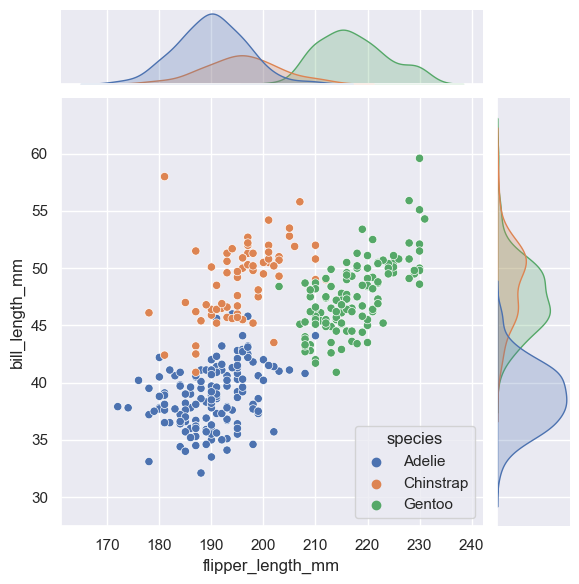

In [93]:
sns.jointplot(data=penguins, x='flipper_length_mm', y='bill_length_mm', hue='species')
plt.savefig('jointplot.png', dpi=200);

The other, pairplot(), takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable, respectively:

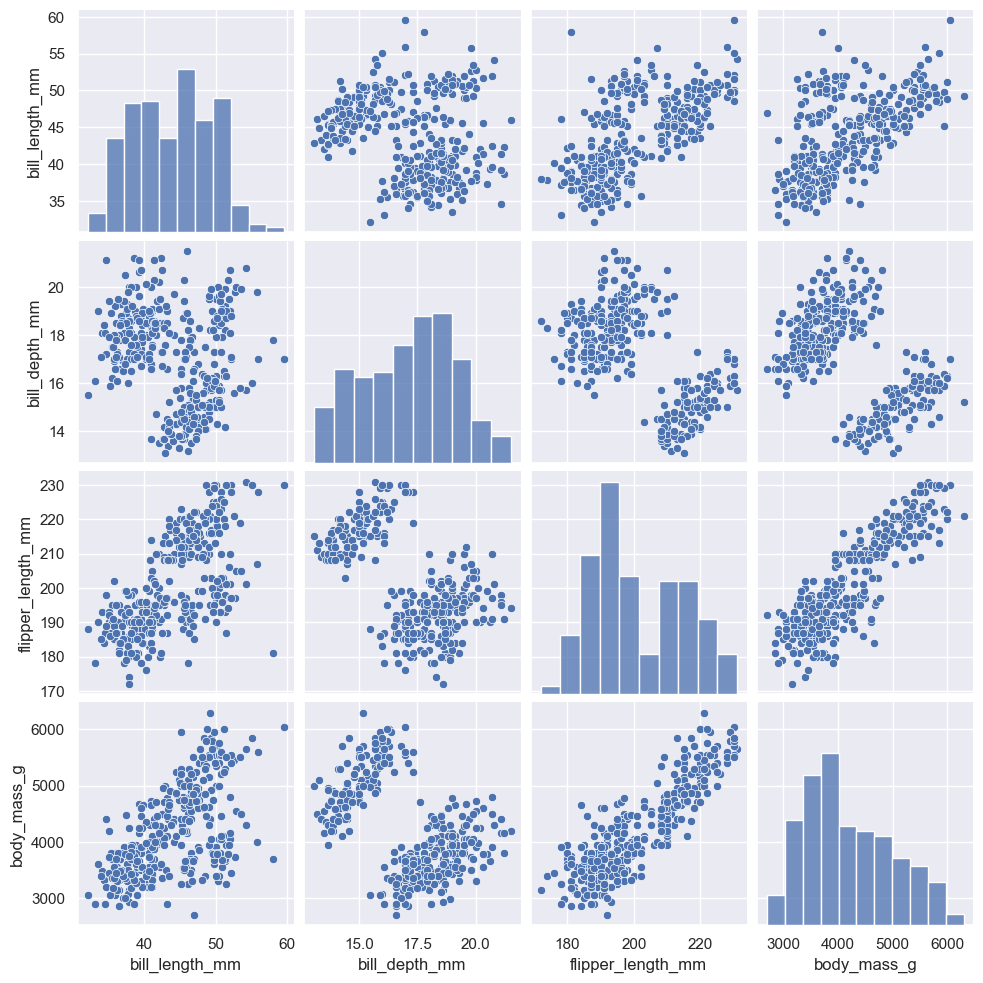

In [96]:
sns.pairplot(data=penguins);

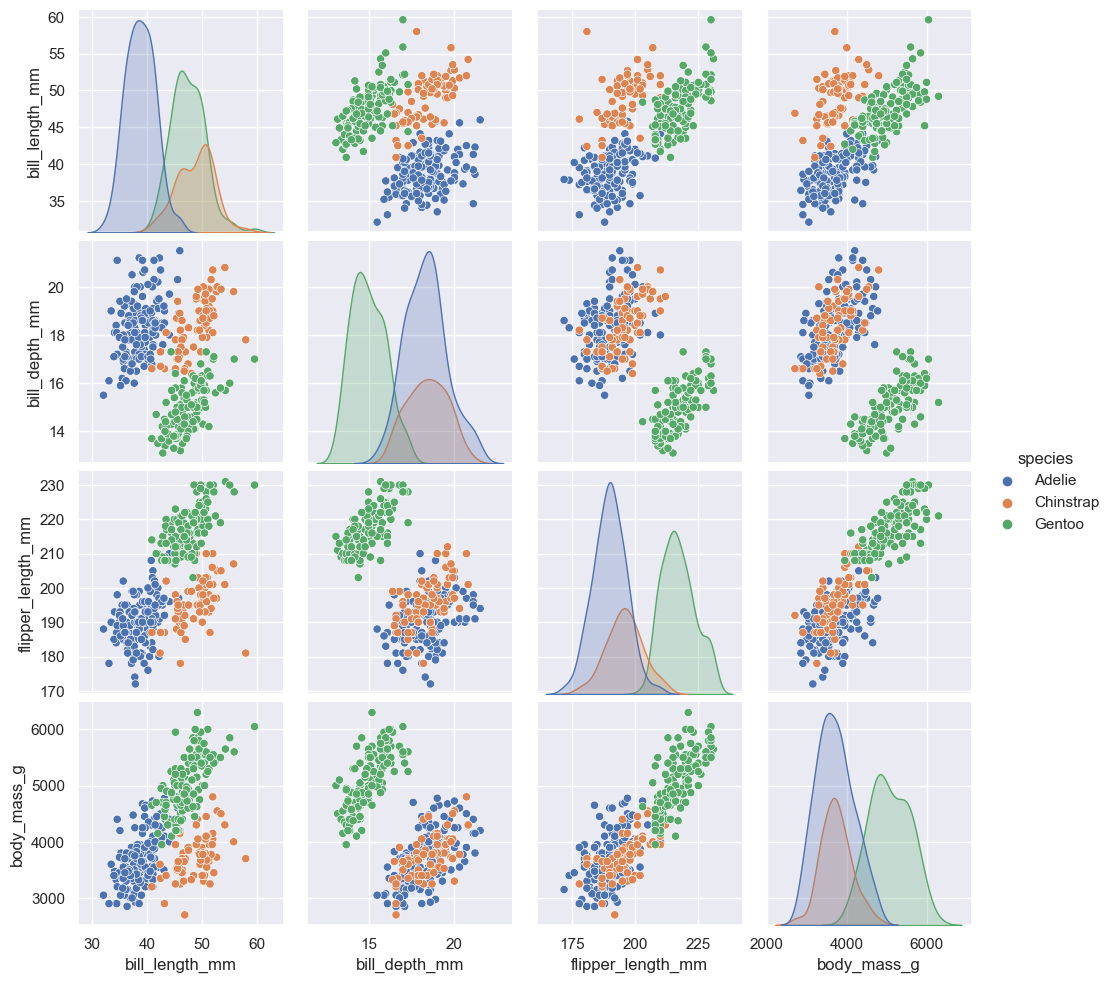

In [94]:
sns.pairplot(data=penguins, hue='species');

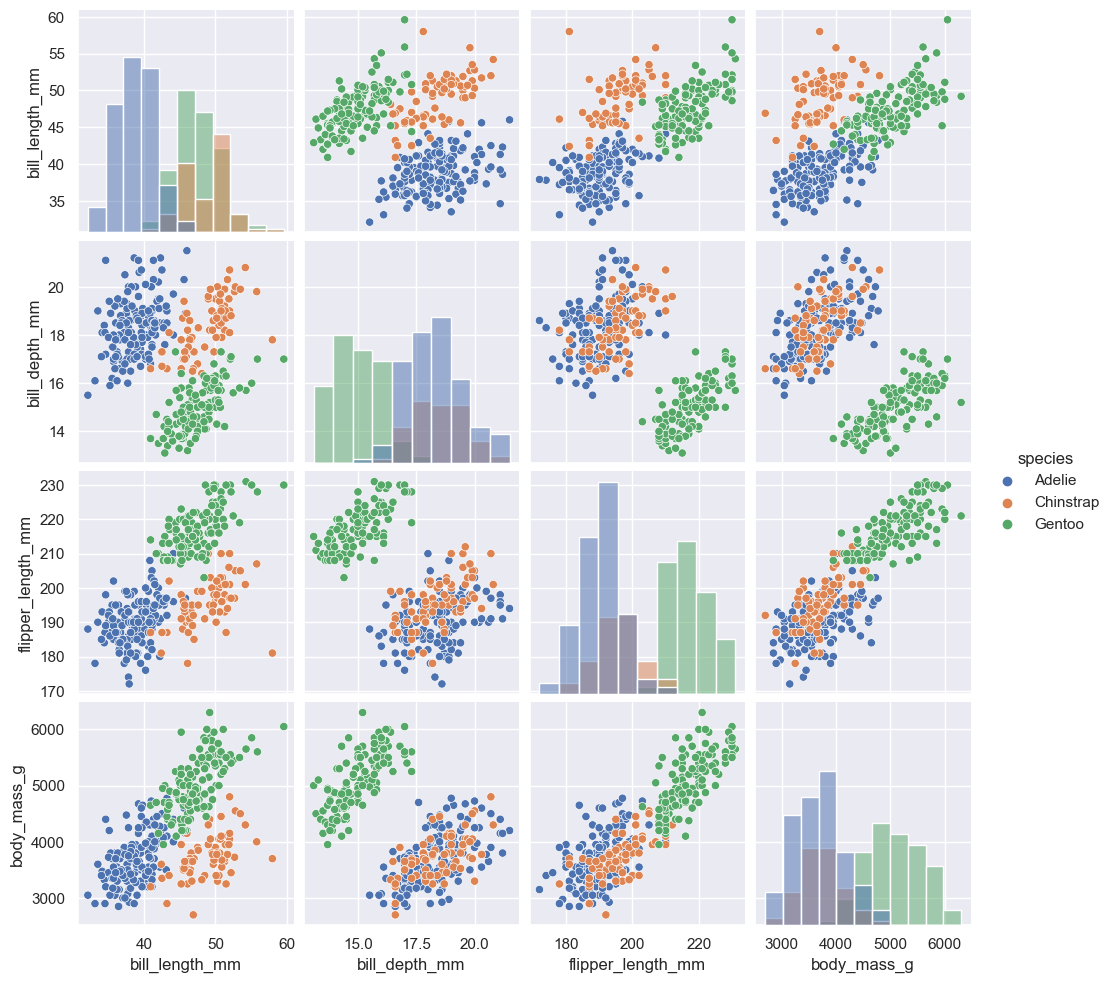

In [97]:
sns.pairplot(penguins, hue="species", diag_kind="hist");

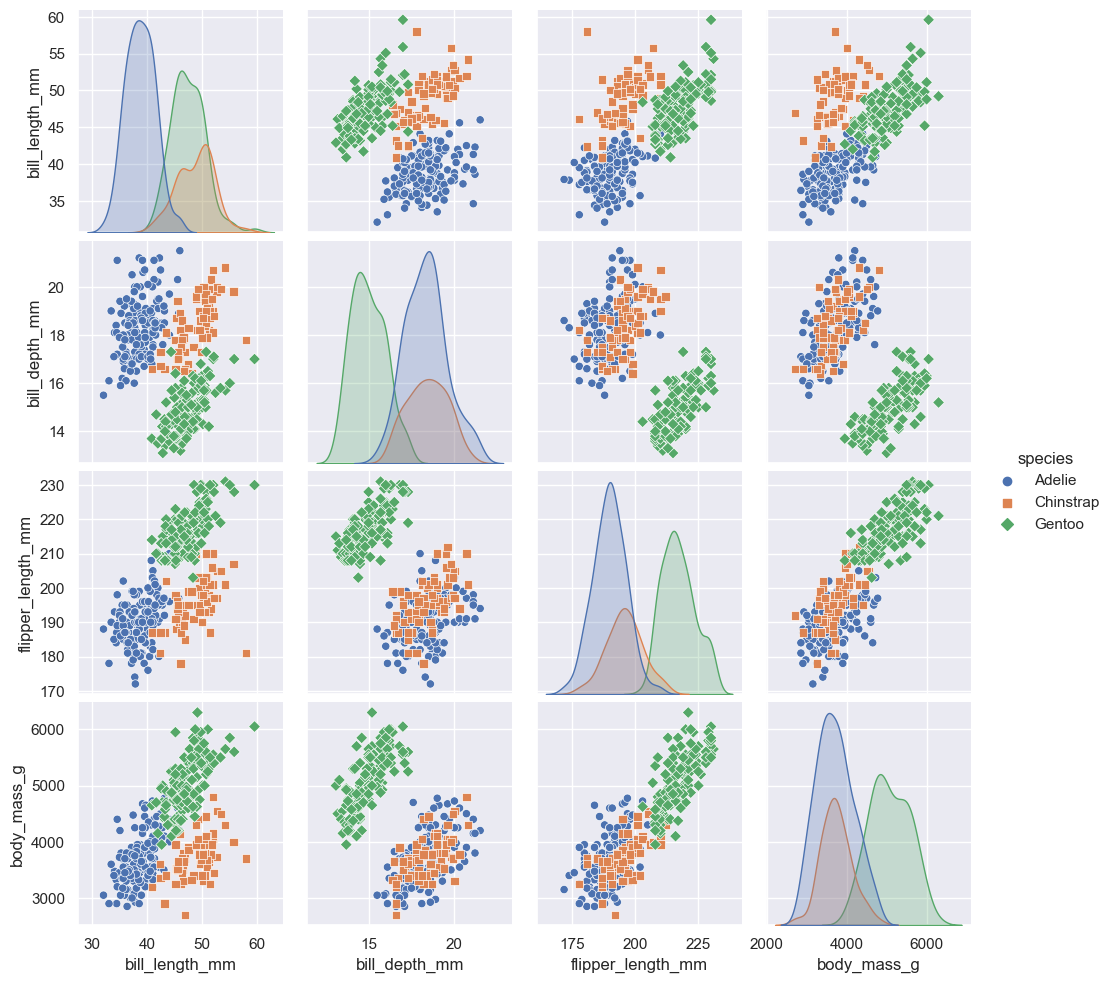

In [98]:
sns.pairplot(penguins, hue="species", markers=["o", "s", "D"]);

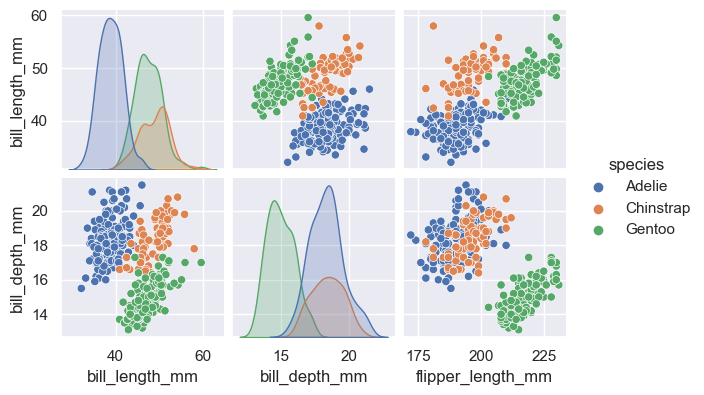

In [101]:
sns.pairplot(
    penguins,
    x_vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
    y_vars=["bill_length_mm", "bill_depth_mm"],
    hue='species',
    height=2
);

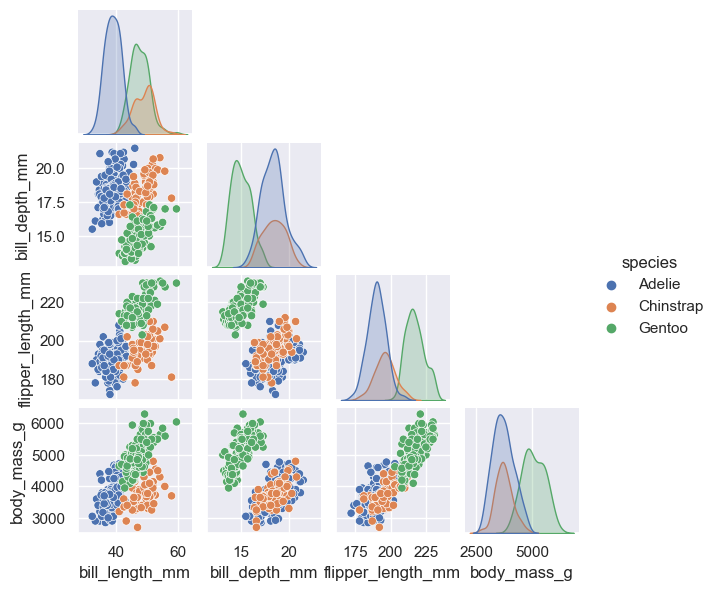

In [104]:
sns.pairplot(penguins, hue='species', corner=True, height=1.5);

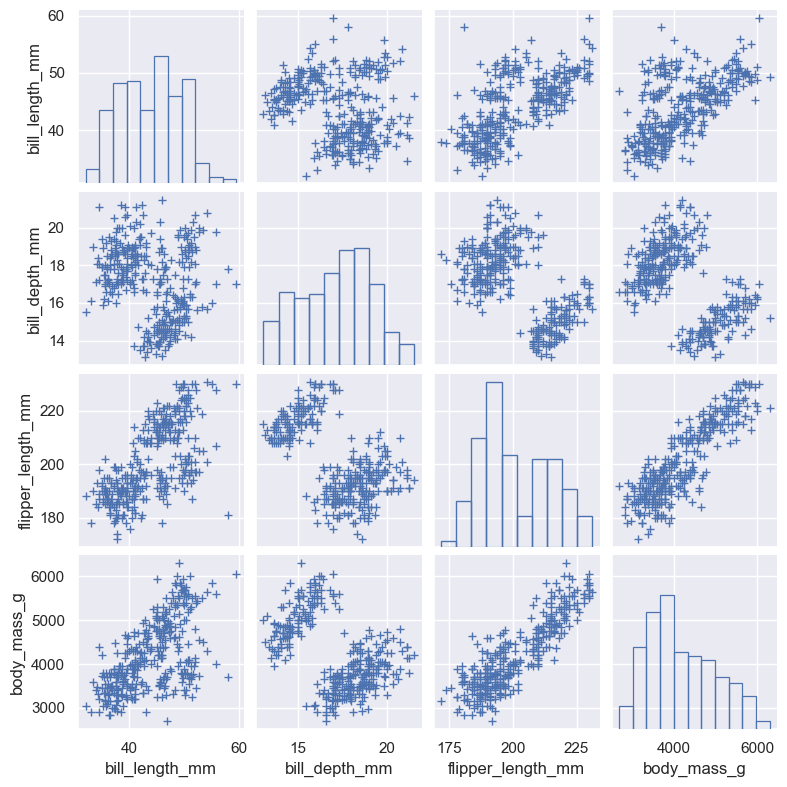

In [105]:
sns.pairplot(
    penguins,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
    height=2
);

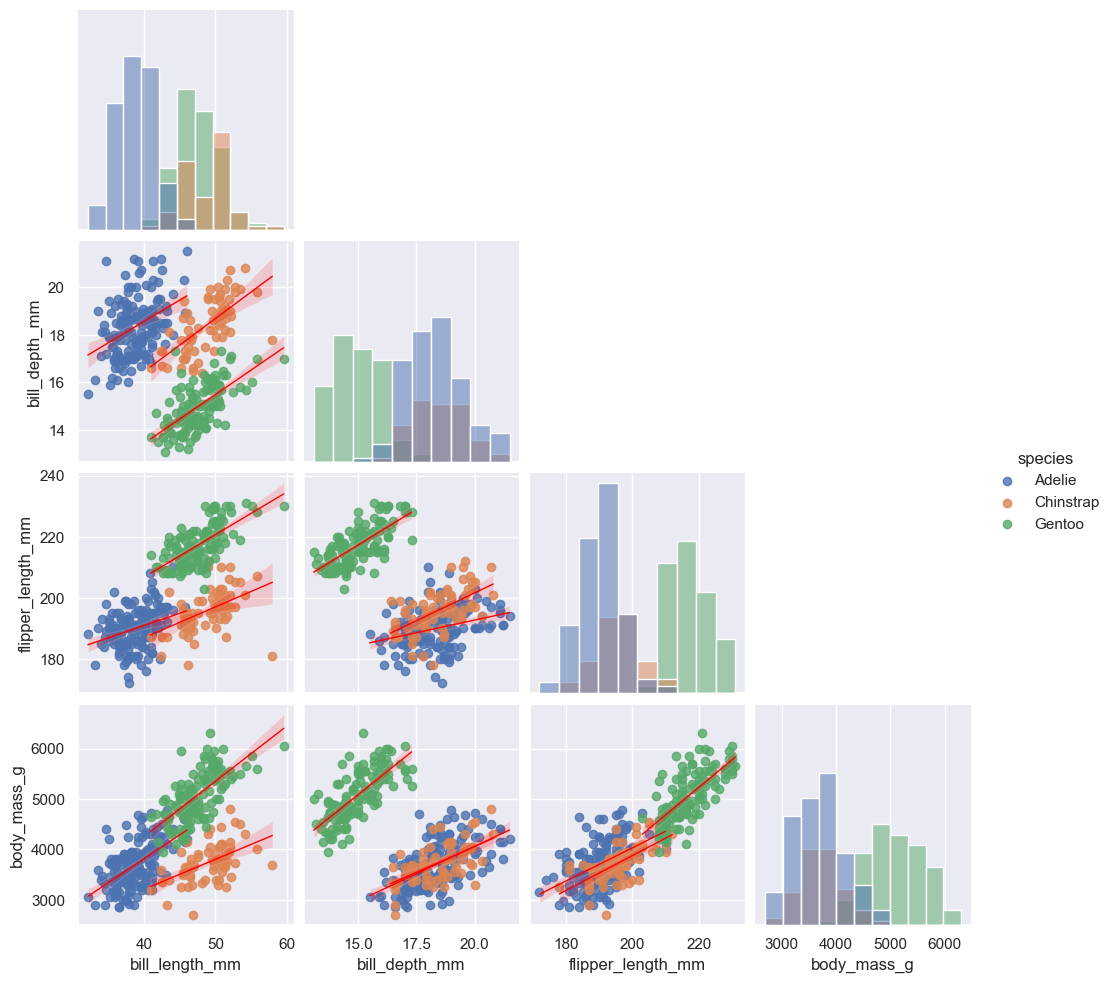

In [121]:
sns.pairplot(penguins, hue="species", kind="reg", diag_kind='hist', corner=True, plot_kws={'line_kws':{'color':'red', 'linewidth':1}})
plt.savefig('pairplot_corner.png', dpi=200);

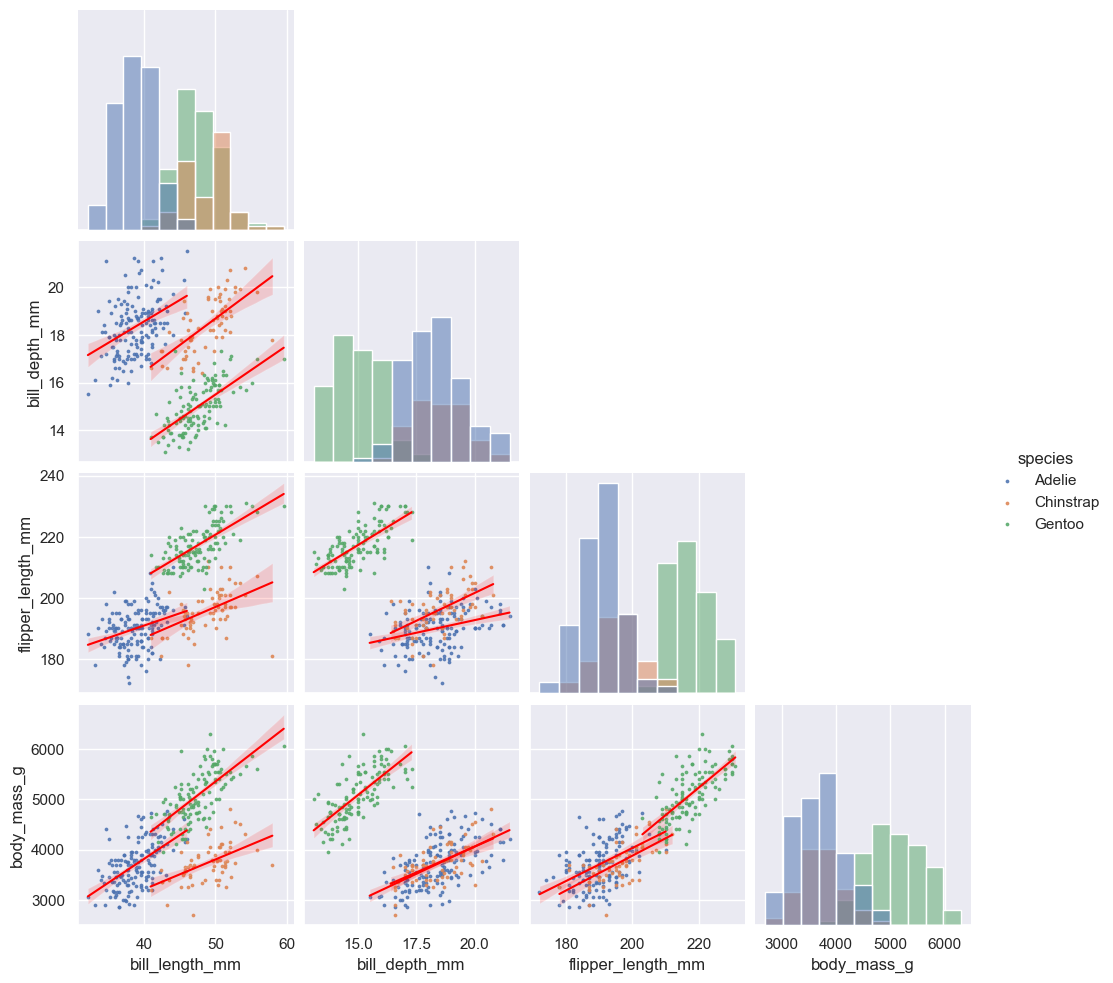

In [137]:
sns.pairplot(penguins, hue="species", kind="reg", diag_kind='hist', corner=True, plot_kws={'line_kws':{'color':'red', 'linewidth':1.5}, 'scatter_kws':{'s':3}})
plt.savefig('pairplot_corner.png', dpi=200);

## Opinionated defaults and flexible customization

In many cases, seaborn will also choose default values for its parameters based on characteristics of the data. For example, the color mappings that we have seen so far used distinct hues (blue, orange, and sometimes green) to represent different levels of the categorical variables assigned to hue. When mapping a numeric variable, some functions will switch to a continuous gradient:

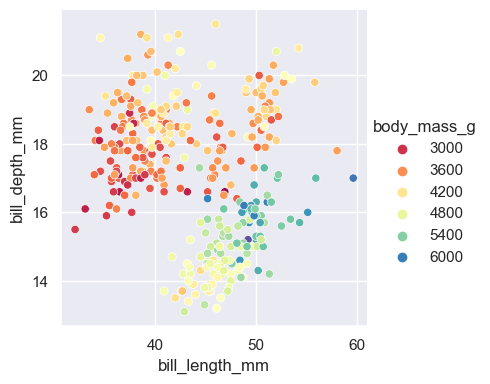

In [142]:
sns.relplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='body_mass_g', palette=sns.color_palette("Spectral", as_cmap=True), height=4)
plt.savefig('scatter_palette.png', dpi=200);

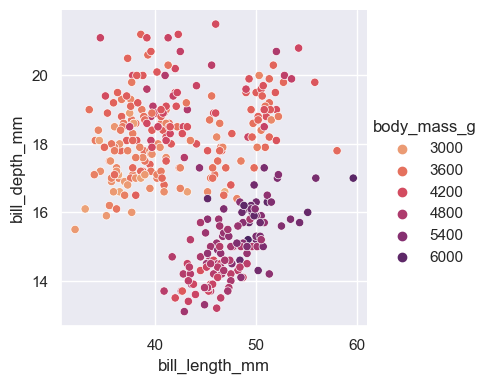

In [143]:
sns.relplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='body_mass_g', palette=sns.color_palette("flare", as_cmap=True), height=4)
plt.savefig('scatter_palette1.png', dpi=200);

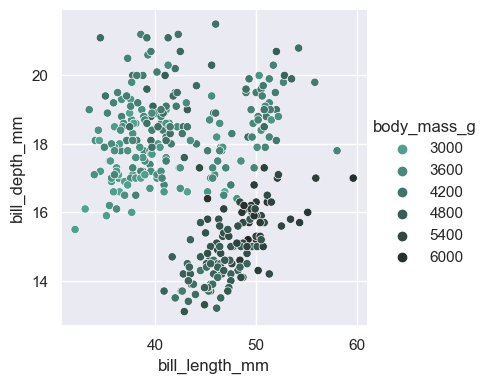

In [144]:
sns.relplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='body_mass_g', palette=sns.color_palette("dark:#5A9_r", as_cmap=True), height=4)


### Theme customization

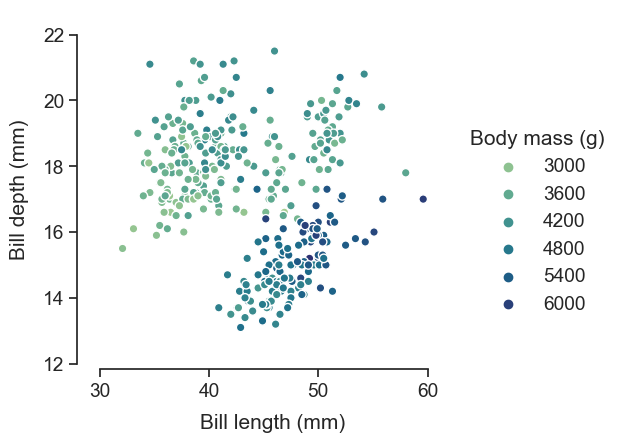

In [154]:
sns.set_theme(style='ticks', font_scale=1.25)
g = sns.relplot(data=penguins, 
                x='bill_length_mm', y='bill_depth_mm', hue='body_mass_g',
                palette='crest', marker='.', s=150)
g.set_axis_labels('Bill length (mm)', 'Bill depth (mm)', labelpad=10)
g.legend.set_title('Body mass (g)')
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True);